In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import basicMCMC

In [3]:
df = basicMCMC.readCSV()
graph = basicMCMC.buildAttackGraph(df)
attackPR = basicMCMC.pagerank(graph)

In [4]:
attackPR

array([0.0238685 , 0.05422564, 0.04692921, 0.02235459, 0.09214996,
       0.06710879, 0.07387665, 0.05600747, 0.06500097, 0.0536509 ,
       0.07907376, 0.05661636, 0.08747568, 0.0340825 , 0.03928258,
       0.05360596, 0.04642334, 0.04826714])

In [5]:
def createDict(pr):
    types = ['Normal','Fire','Water','Electric','Grass','Ice',
        'Fighting','Poison','Ground','Flying','Psychic','Bug',
        'Rock','Ghost','Dragon','Dark','Steel','Fairy']
    
    prDict = {}
    for i, type in enumerate(types):
        prDict[type] = pr[i]
    return prDict

attack = createDict(attackPR)

In [20]:
def plot(prDict, num=18):
    plt.figure(figsize=(20,10))
    plt.bar(np.arange(num), prDict.values(), align='center', alpha=1.0)
    plt.xticks(np.arange(num), prDict.keys())
    plt.ylabel('PR Probability')
    plt.xlabel('Pokemon Type')
    plt.title('Pokemon Type PR')
    plt.show()

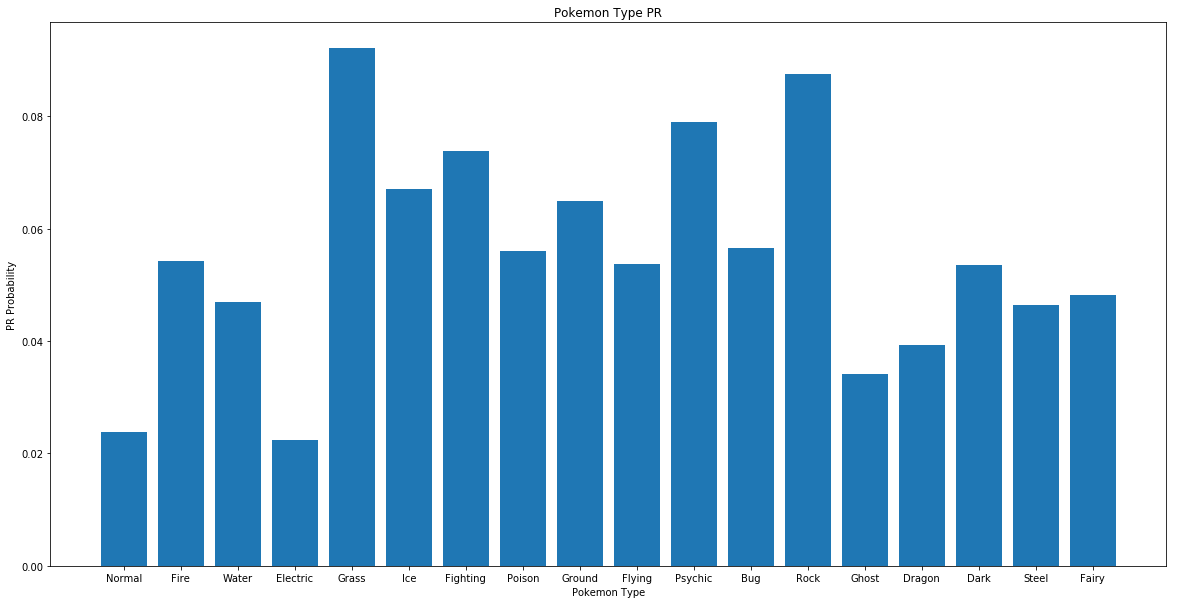

In [7]:
plot(attack)

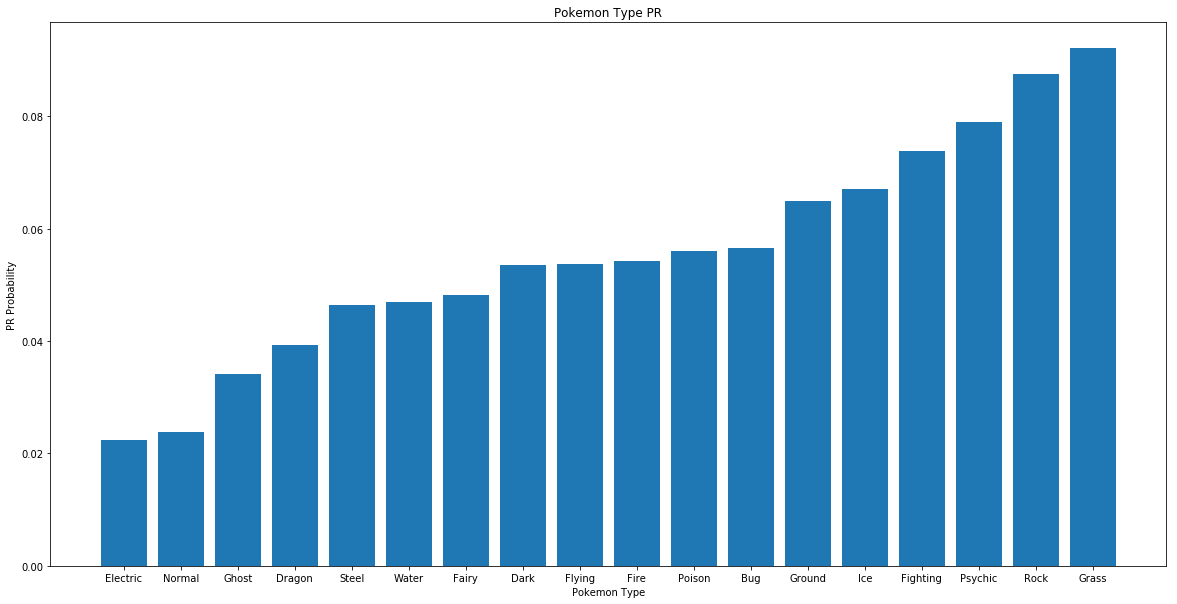

In [8]:
sortedAttack = sorted(attack.items(), key=lambda x: x[1])
sortedAttackDict = {}
for pair in sortedAttack:
    sortedAttackDict[pair[0]] = pair[1]

plot(sortedAttackDict)

In [9]:
defenseGraph = basicMCMC.buildDefendGraph(df)
defendPR = basicMCMC.pagerank(defenseGraph)
defendPR

array([0.03176998, 0.04220034, 0.04060872, 0.04060872, 0.09083361,
       0.03462008, 0.10077135, 0.0807181 , 0.07054833, 0.04904405,
       0.01594004, 0.11752555, 0.07451755, 0.05523661, 0.01594004,
       0.05145344, 0.0474203 , 0.04024318])

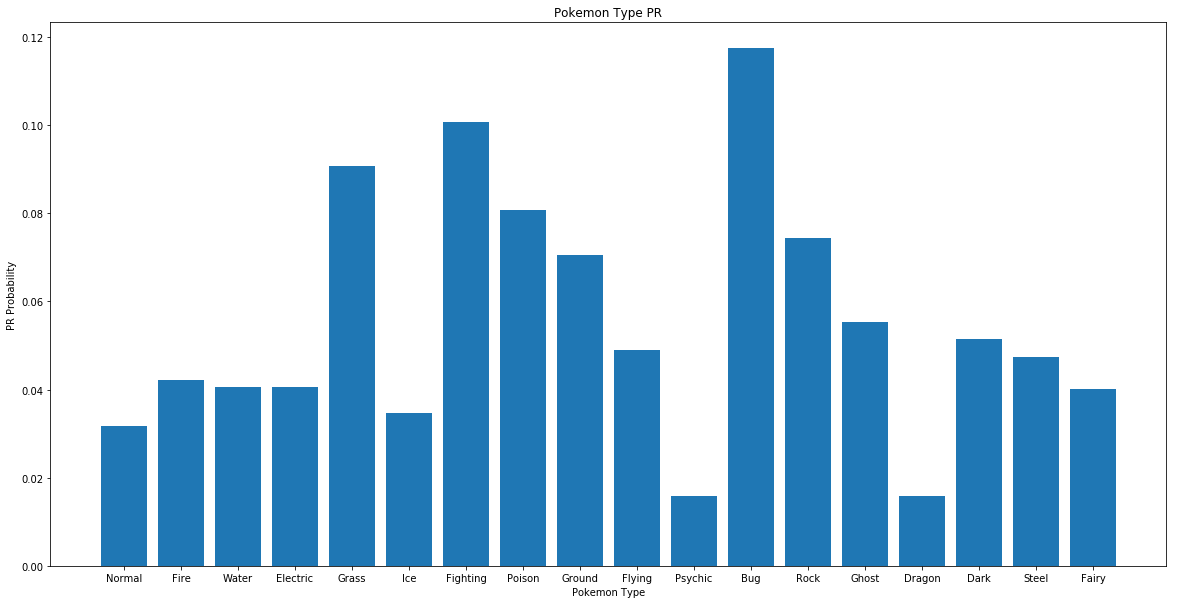

In [10]:
defend = createDict(defendPR)
plot(defend)

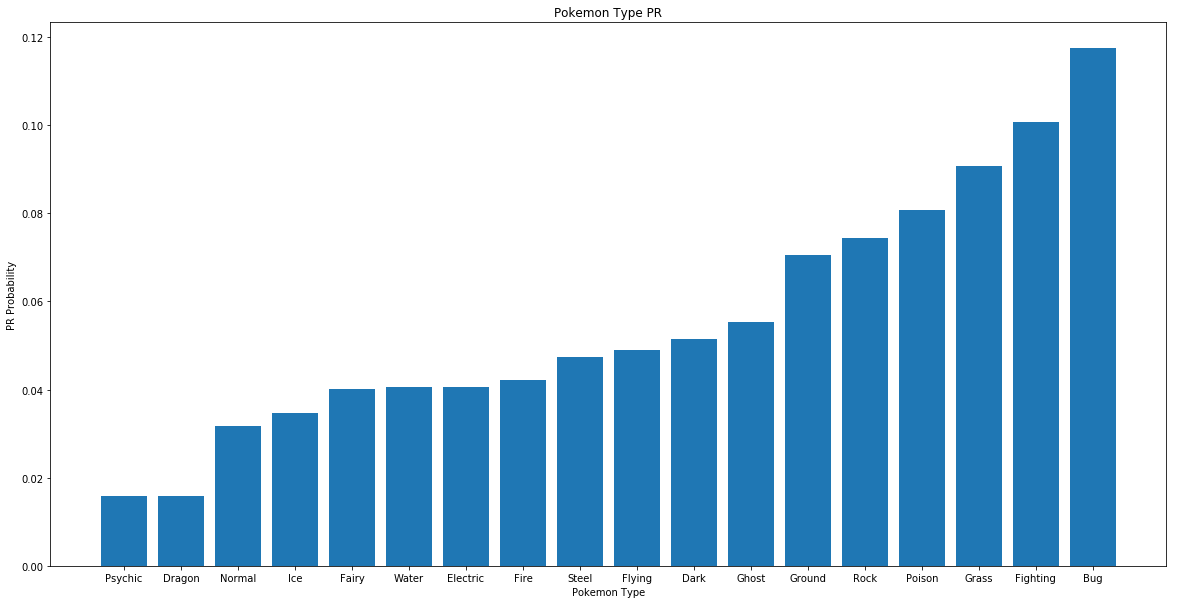

In [11]:
sortedDefend = sorted(defend.items(), key=lambda x: x[1])
sortedDefendDict = {}
for pair in sortedDefend:
    sortedDefendDict[pair[0]] = pair[1]

plot(sortedDefendDict)

In [12]:
import dualMCMC
dualDF = pd.read_csv('dualTyping.csv')

In [15]:
dualAttackGraph = dualMCMC.buildAttackGraph(dualDF)
dualAttackPR = dualMCMC.pagerank(dualAttackGraph)
dualAttackPR

array([0.00077495, 0.00077495, 0.00392938, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00254283, 0.00077495, 0.00077495,
       0.00275927, 0.00077495, 0.0040682 , 0.00077495, 0.00077495,
       0.00077495, 0.00344725, 0.00077495, 0.00410755, 0.0043628 ,
       0.00727688, 0.00077495, 0.00656702, 0.00660852, 0.00077495,
       0.00490584, 0.00841054, 0.00546367, 0.0060073 , 0.00077495,
       0.0064183 , 0.00596077, 0.00077495, 0.00077495, 0.00573953,
       0.00077495, 0.00077495, 0.00077495, 0.00441564, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00285806,
       0.0059043 , 0.00582827, 0.00298297, 0.00491706, 0.00561223,
       0.0061098 , 0.00422881, 0.0075872 , 0.00518535, 0.00472843,
       0.00077495, 0.0053182 , 0.00472276, 0.00077495, 0.00077495,
       0.00506661, 0.00516033, 0.00404641, 0.00077495, 0.00544

In [18]:
def dualTypeDict(pr):
    types = ['Normal','Fire','Water','Electric','Grass','Ice',
            'Fighting','Poison','Ground','Flying','Psychic','Bug',
            'Rock','Ghost','Dragon','Dark','Steel','Fairy']
    
    dualTypes = []
    for type1 in types:
        for type2 in types:
            dualTypes.append(type1+type2)

    typeMap = {}
    for i, type in enumerate(dualTypes):
        typeMap[type] = pr[i]
    return typeMap

dualAttackDict= dualTypeDict(dualAttackPR)

In [19]:
dualAttackDict

{'NormalNormal': 0.0007749536913345548,
 'NormalFire': 0.0007749536913345548,
 'NormalWater': 0.003929379486865259,
 'NormalElectric': 0.0007749536913345548,
 'NormalGrass': 0.0007749536913345548,
 'NormalIce': 0.0007749536913345548,
 'NormalFighting': 0.0007749536913345548,
 'NormalPoison': 0.0025428301076663583,
 'NormalGround': 0.0007749536913345548,
 'NormalFlying': 0.0007749536913345548,
 'NormalPsychic': 0.002759271121006749,
 'NormalBug': 0.0007749536913345548,
 'NormalRock': 0.004068202385887463,
 'NormalGhost': 0.0007749536913345548,
 'NormalDragon': 0.0007749536913345548,
 'NormalDark': 0.0007749536913345548,
 'NormalSteel': 0.003447254296252657,
 'NormalFairy': 0.0007749536913345548,
 'FireNormal': 0.004107550618932142,
 'FireFire': 0.004362798424863612,
 'FireWater': 0.007276875302143521,
 'FireElectric': 0.0007749536913345548,
 'FireGrass': 0.006567017023804892,
 'FireIce': 0.006608521754392096,
 'FireFighting': 0.0007749536913345548,
 'FirePoison': 0.0049058354198553795,


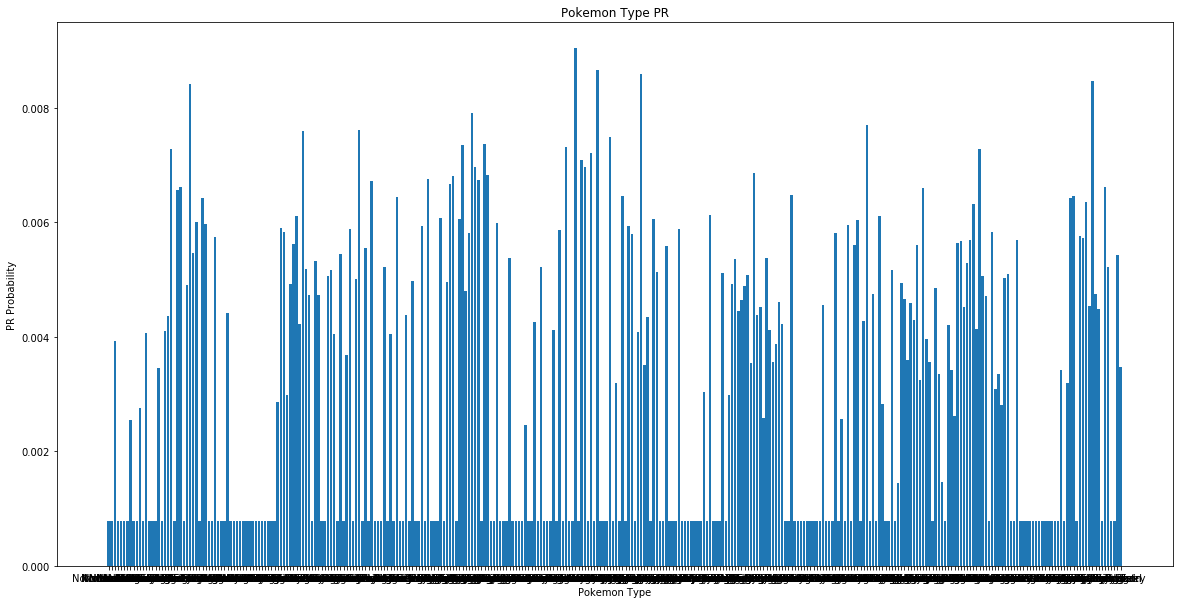

In [21]:
plot(dualAttackDict, num=18**2)

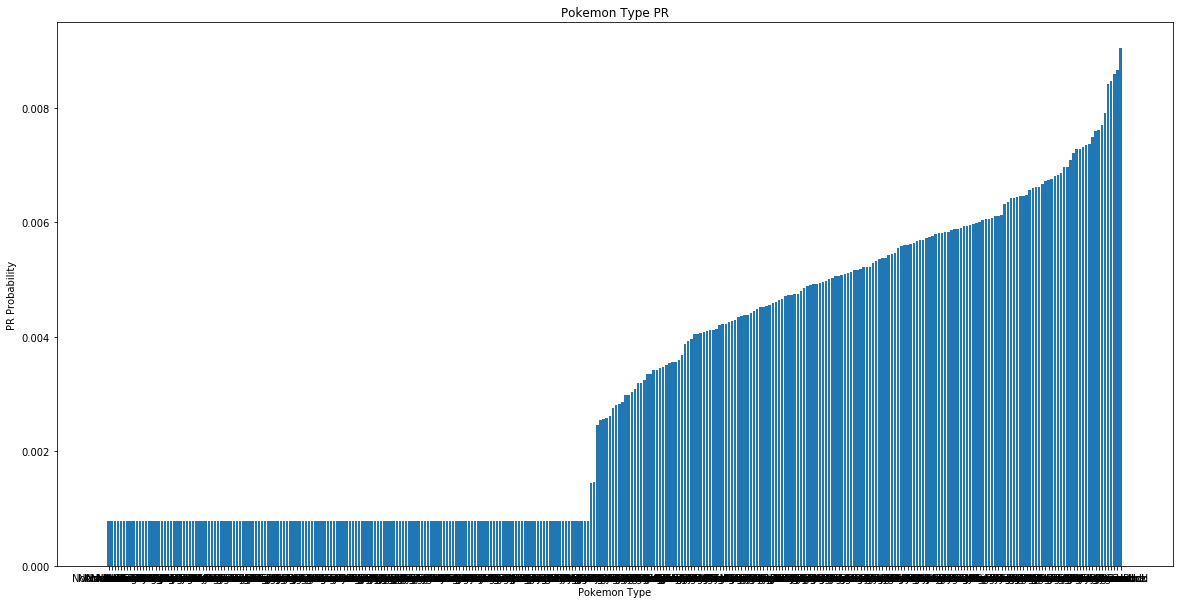

In [23]:
sortedDualAttack = sorted(dualAttackDict.items(), key=lambda x: x[1])
sortedDualAttackDict = {}
for pair in sortedDualAttack:
    sortedDualAttackDict[pair[0]] = pair[1]

plot(sortedDualAttackDict, num=18**2)

In [24]:
dualDefendGraph = dualMCMC.buildDefendGraph(dualDF)
dualDefendPR = dualMCMC.pagerank(dualDefendGraph)
dualDefendPR

array([0.00077495, 0.00077495, 0.00502428, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00518163, 0.00077495, 0.00077495,
       0.00292962, 0.00077495, 0.00462459, 0.00077495, 0.00077495,
       0.00077495, 0.00812044, 0.00077495, 0.00591368, 0.00479027,
       0.00648288, 0.00077495, 0.00707178, 0.00556442, 0.00077495,
       0.00658648, 0.00651779, 0.0056572 , 0.00678734, 0.00077495,
       0.00618585, 0.00568866, 0.00077495, 0.00077495, 0.00719094,
       0.00077495, 0.00077495, 0.00077495, 0.00465424, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00421083,
       0.00699217, 0.00663476, 0.00415191, 0.00633191, 0.00443965,
       0.0061108 , 0.00713686, 0.00482572, 0.00560393, 0.00566691,
       0.00077495, 0.00594456, 0.00502286, 0.00077495, 0.00077495,
       0.00823423, 0.00572222, 0.0048477 , 0.00077495, 0.00669

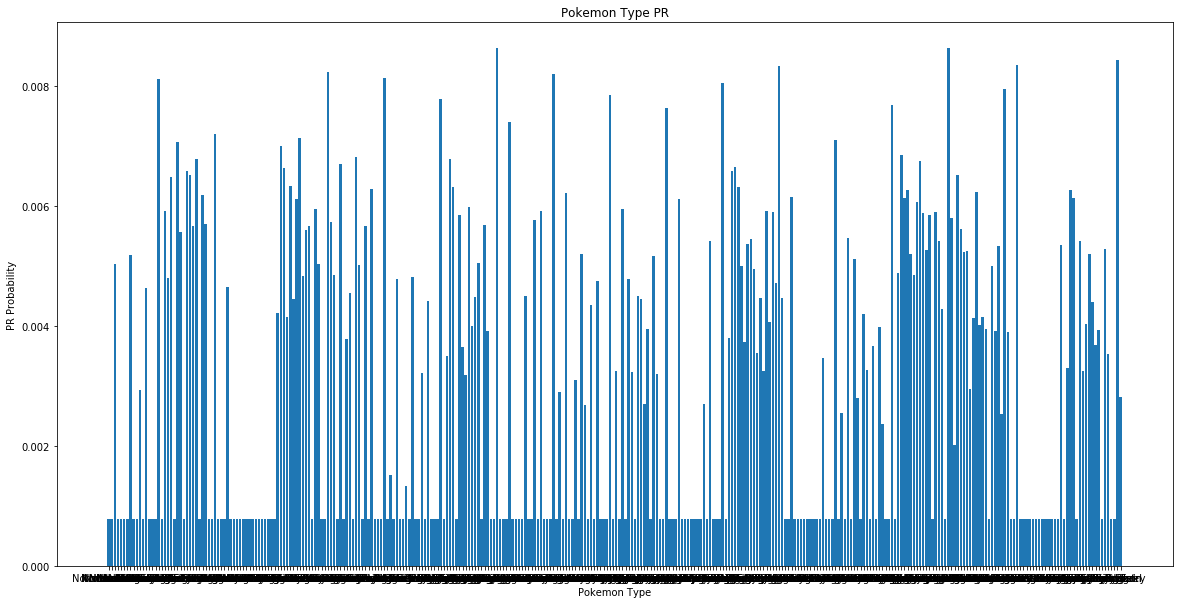

In [27]:
dualDefendDict= dualTypeDict(dualDefendPR)
plot(dualDefendDict, num=18**2)

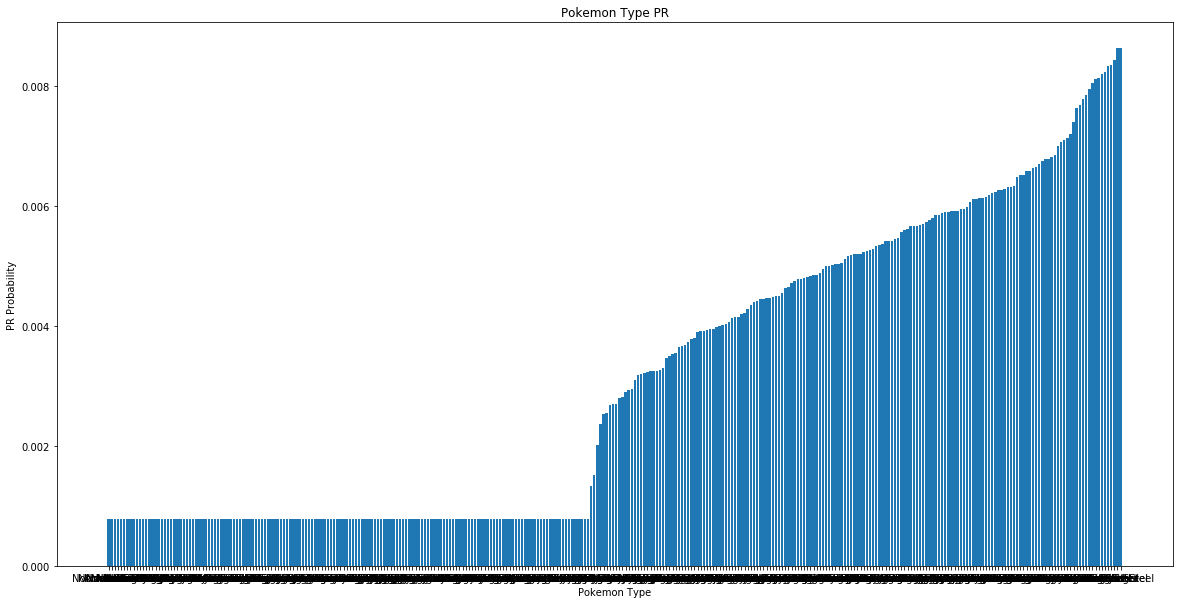

In [28]:
sortedDualDefend = sorted(dualDefendDict.items(), key=lambda x: x[1])
sortedDualDefendDict = {}
for pair in sortedDualDefend:
    sortedDualDefendDict[pair[0]] = pair[1]

plot(sortedDualDefendDict, num=18**2)

In [30]:
#Best Attacking Type
sortedDualAttack[len(sortedDualAttack)-1][0]

'GroundIce'

In [31]:
#Best Defending Type
sortedDualDefend[len(sortedDualDefend)-1][0]

'FightingSteel'